# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

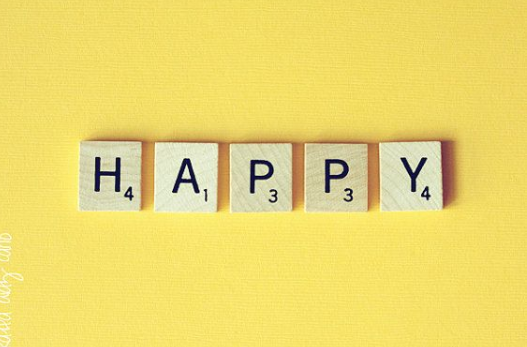


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Exercise 1.Tell a story with your dataset, to try to answer the following question:

"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

'Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level '

In [3]:
data = pd.read_csv('../../datasets/Students_turn/Ex2.2._Happiness-Score.csv')
data

Unnamed: 0  Unnamed: 0.1  Overall rank         Country or region  Score  \
0             0             0             1                   Finland  7.632   
1             1             1             2                    Norway  7.594   
2             2             2             3                   Denmark  7.555   
3             3             3             4                   Iceland  7.495   
4             4             4             5               Switzerland  7.487   
..          ...           ...           ...                       ...    ...   
307         307           151           152                    Rwanda  3.334   
308         308           152           153                  Tanzania  3.231   
309         309           153           154               Afghanistan  3.203   
310         310           154           155  Central African Republic  3.083   
311         311           155           156               South Sudan  2.853   

     GDP per capita  Social support  Healthy life expectancy  \
0             1.305           1.592                      NaN   
1             1.456           1.582                      NaN   
2             1.351           1.590                      NaN   
3             1.343           1.644                      NaN   
4             1.420           1.549                      NaN   
..              ...             ...                      ...   
307           0.359           0.711                      NaN   
308           0.476           0.885                      NaN   
309           0.350           0.517                      NaN   
310           0.026           0.000                      NaN   
311           0.306           0.575                      NaN   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                           0.681       0.202                      0.393  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
3                           0.677       0.353                      0.138  2018  
4                           0.660       0.256                      0.357  2018  
..                            ...         ...                        ...   ...  
307                         0.555       0.217                      0.411  2019  
308                         0.417       0.276                      0.147  2019  
309                         0.000       0.158                      0.025  2019  
310                         0.225       0.235                      0.035  2019  
311                         0.010       0.202                      0.091  2019  

[312 rows x 12 columns]

## 1. Data Cleaning

In [4]:
#Step 1: Getting info from our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    312 non-null    int64  
 1   Unnamed: 0.1                  312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [5]:
#Step2: remove the spaces, if any, within the column names
data.columns.str.strip()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Overall rank', 'Country or region',
       'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [6]:
#Step 3: We remove the columns 'Unnamed: 0','Unnamed: 0.1','Healthy life expectancy' because:
#The 2 first columns do not give any useful information
#The column 'Healthy life expectancy' only has 7 non-null values
data.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Healthy life expectancy'], inplace = True)

In [7]:
#Setp 4: Capitalize the column "year"
#Option #1
data.rename(columns={"year": "Year"}, inplace = True)
#Option #2
##data.rename(columns={"year": "Year"}, errors="raise")
data

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Freedom to make life choices  Generosity  \
0             1.592                         0.681       0.202   
1             1.582                         0.686       0.286   
2             1.590                         0.683       0.284   
3             1.644                         0.677       0.353   
4             1.549                         0.660       0.256   
..              ...                           ...         ...   
307           0.711                         0.555       0.217   
308           0.885                         0.417       0.276   
309           0.517                         0.000       0.158   
310           0.000                         0.225       0.235   
311           0.575                         0.010       0.202   

     Perceptions of corruption  Year  
0                        0.393  2018  
1                        0.340  2018  
2                        0.408  2018  
3                        0.138  2018  
4                        0.357  2018  
..                         ...   ...  
307                      0.411  2019  
308                      0.147  2019  
309                      0.025  2019  
310                      0.035  2019  
311                      0.091  2019  

[312 rows x 9 columns]

In [8]:
data.rename(columns={"Country or region": "Country","Freedom to make life choices":"Freedom"}, inplace = True)

In [9]:
#Step 5: Checking for duplicates
data.duplicated().sum()

0

In [10]:
data["Country"] = data["Country"].replace("North Macedonia", "Macedonia")

In [11]:
#Step 6: Changing the names of the column "Country or region" / "Freedom to make life choices"
data.rename(columns={"Country or region": "Country","Freedom to make life choices":"Freedom"}, inplace = True)

In [12]:
data

Overall rank                   Country  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Freedom  Generosity  Perceptions of corruption  Year  
0             1.592    0.681       0.202                      0.393  2018  
1             1.582    0.686       0.286                      0.340  2018  
2             1.590    0.683       0.284                      0.408  2018  
3             1.644    0.677       0.353                      0.138  2018  
4             1.549    0.660       0.256                      0.357  2018  
..              ...      ...         ...                        ...   ...  
307           0.711    0.555       0.217                      0.411  2019  
308           0.885    0.417       0.276                      0.147  2019  
309           0.517    0.000       0.158                      0.025  2019  
310           0.000    0.225       0.235                      0.035  2019  
311           0.575    0.010       0.202                      0.091  2019  

[312 rows x 9 columns]

In [13]:
#Step 7 : analyze missing values in column 'Perceptions of corruption'
data[data["Perceptions of corruption"].isnull()]

Overall rank               Country  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Freedom  Generosity  Perceptions of corruption  Year  
19    0.284       0.186                        NaN  2018

In [14]:
data[(data["Country"] == "United Arab Emirates") & (data["Year"] == 2019)]

Overall rank               Country  Score  GDP per capita  \
176            21  United Arab Emirates  6.825           1.503   

     Social support  Freedom  Generosity  Perceptions of corruption  Year  
176            1.31    0.598       0.262                      0.182  2019

In [15]:
#We have a missing value on Perceptions of corruption for United Arab Emirates for the year 2018. 
#Since we have the data for 2019, we decided to replace the NaN value in 2018 with that one
data["Perceptions of corruption"].fillna(0.182,inplace = True)
data[(data["Country"] == "United Arab Emirates") & (data["Year"] == 2018)]

Overall rank               Country  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Freedom  Generosity  Perceptions of corruption  Year  
19    0.284       0.186                      0.182  2018

## 3. Data Visualization

### 3.1 Detect outliers

<AxesSubplot:>

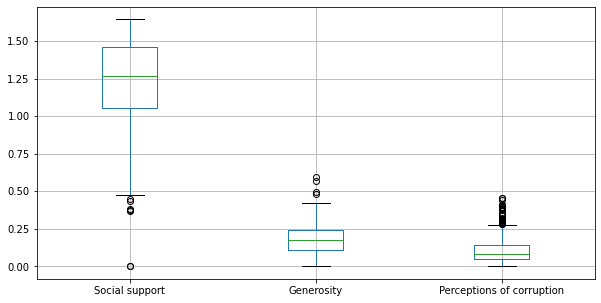

In [16]:
#Step 8: We created boxplots to identify the outliers. For the visualization we kept only those columns that have outliers
plt.figure(figsize = (10,5))


data.boxplot(column = [ 'Social support',
        'Generosity', 'Perceptions of corruption'])


<AxesSubplot:>

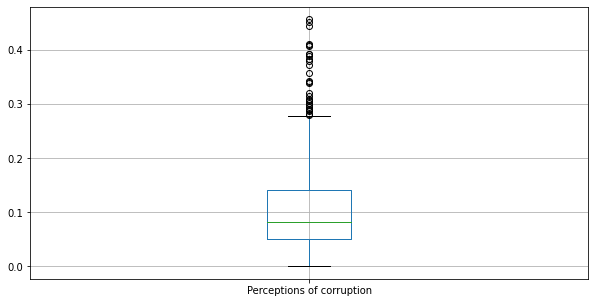

In [17]:
#We do a focus on "Perception of corruption". 
#With this visualization we came to the conclusion that there are some countries that do not think there's corruption where they live
plt.figure(figsize = (10,5))


data.boxplot(column = ['Perceptions of corruption'])

In [18]:
#Conclusion boxplots: Based on the results, we decided to keep all the data. It makes sense to us that majority of countries 
#has a low perception of corruption and, therefore, we have outliers of those who don't.
#Regarding the column "Social support" we also believe that Central African Republic score (0.0), was a correct value that's within the defined range

### 3.2 Hypothesis

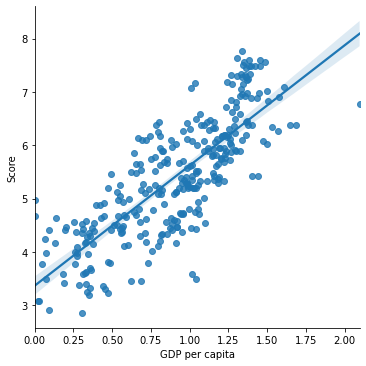

In [19]:
# Hypothesis 1: the higher GDP per Capita, the happier the country will be
sns.lmplot(x="GDP per capita", y="Score", data=data)

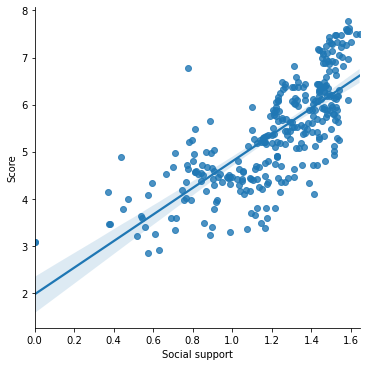

In [20]:
# Hypothesis 2: the higher the Social support score is, the happier the country will be
sns.lmplot(x="Social support", y="Score", data=data)

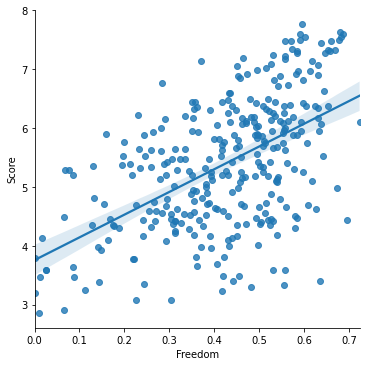

In [21]:
# Hypothesis 3: the higher the Freedom score is, the happier the country will be
sns.lmplot(x="Freedom", y="Score", data=data)

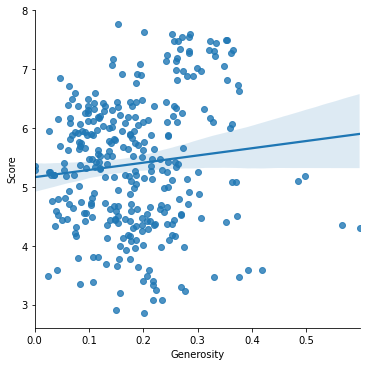

In [22]:
# Hypothesis 4: the higher the Generosity score is, the happier the country will be
sns.lmplot(x="Generosity", y="Score", data=data)

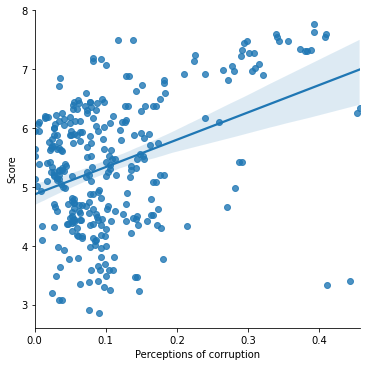

In [23]:
# Hypothesis 5: the lower the Perceptions of corruption score is, the happier the country will be
sns.lmplot(x="Perceptions of corruption", y="Score", data=data)

In [24]:
num_data = data[['Score', 'GDP per capita', 'Social support',
       'Freedom', 'Generosity', 'Perceptions of corruption']]
num_data

Score  GDP per capita  Social support  Freedom  Generosity  \
0    7.632           1.305           1.592    0.681       0.202   
1    7.594           1.456           1.582    0.686       0.286   
2    7.555           1.351           1.590    0.683       0.284   
3    7.495           1.343           1.644    0.677       0.353   
4    7.487           1.420           1.549    0.660       0.256   
..     ...             ...             ...      ...         ...   
307  3.334           0.359           0.711    0.555       0.217   
308  3.231           0.476           0.885    0.417       0.276   
309  3.203           0.350           0.517    0.000       0.158   
310  3.083           0.026           0.000    0.225       0.235   
311  2.853           0.306           0.575    0.010       0.202   

     Perceptions of corruption  
0                        0.393  
1                        0.340  
2                        0.408  
3                        0.138  
4                        0.357  
..                         ...  
307                      0.411  
308                      0.147  
309                      0.025  
310                      0.035  
311                      0.091  

[312 rows x 6 columns]

### 3.3 Correlation

In [25]:
num_data_corr = num_data.corr()
num_data_corr

Score  GDP per capita  Social support   Freedom  \
Score                      1.000000        0.797977        0.761080  0.539897   
GDP per capita             0.797977        1.000000        0.713293  0.342953   
Social support             0.761080        0.713293        1.000000  0.420206   
Freedom                    0.539897        0.342953        0.420206  1.000000   
Generosity                 0.106645       -0.044788       -0.014367  0.274993   
Perceptions of corruption  0.396947        0.310951        0.196076  0.439908   

                           Generosity  Perceptions of corruption  
Score                        0.106645                   0.396947  
GDP per capita              -0.044788                   0.310951  
Social support              -0.014367                   0.196076  
Freedom                      0.274993                   0.439908  
Generosity                   1.000000                   0.344378  
Perceptions of corruption    0.344378                   1.000000

<AxesSubplot:>

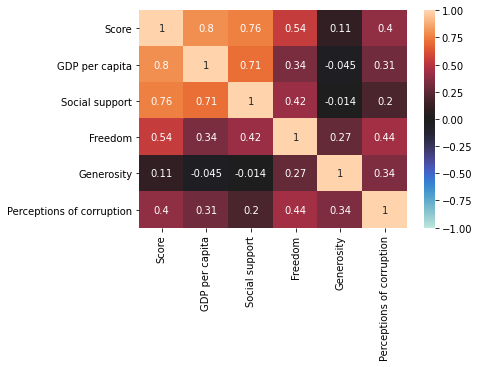

In [26]:
sns.heatmap(num_data_corr,
           xticklabels = num_data_corr.columns.values,
           yticklabels = num_data_corr.columns.values,
           annot = True, vmax=1, vmin=-1, center=0)

## 4. Score by Country

In [27]:
import plotly.express as px  # Be sure to import express

fig = px.choropleth(data,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Score", locationmode='country names', animation_frame="Year") # DataFrame column with color values

fig.update_layout(
    title_text = 'Score by Country' # Create a Title
)

fig.show()  # Output the plot to the screen

## 5. Comparison 2018 vs 2019

In [28]:
## top10 / bottom10 (2018)

In [29]:
data_18 = data[data["Year"] == 2018]
top_10_18 = data_18.head(10)
top_10_18_new = top_10_18.iloc[:,2:8]
top_10_18_new["Classification"] = "Top 10"

In [30]:
bottom_10_18 =data_18.tail(10)
bottom_10_18_new = bottom_10_18.iloc[:,2:8]
bottom_10_18_new["Classification"] = "Bottom 10"

In [31]:
total_18 = pd.merge(top_10_18_new, bottom_10_18_new, how = "outer")
comp_18 = total_18.groupby("Classification").mean()
comp_18f= comp_18.T

<Figure size 720x360 with 0 Axes>

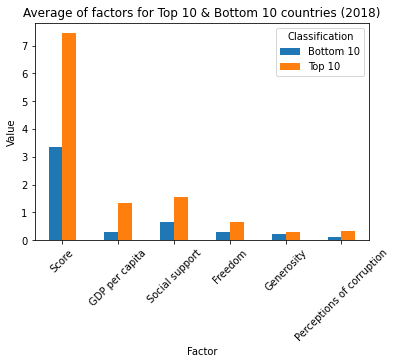

In [32]:
plt.figure(figsize = (10,5))

comp_18f.plot(kind='bar') 
plt.xticks(rotation = 45)

plt.title('Average of factors for Top 10 & Bottom 10 countries (2018)')
plt.ylabel('Value')
plt.xlabel('Factor')

plt.show()

In [33]:
#top10 / bottom10 (2019)

In [34]:
data_19 = data[data["Year"] == 2019]
top_10_19 = data_19.head(10)
top_10_19_new = top_10_19.iloc[:,2:8]
top_10_19_new["Classification"] = "Top 10"

In [35]:
bottom_10_19 =data_19.tail(10)
bottom_10_19_new = bottom_10_19.iloc[:,2:8]
bottom_10_19_new["Classification"] = "Bottom 10"

In [36]:
total_19 = pd.merge(top_10_19_new, bottom_10_19_new, how = "outer")
comp_19 = total_19.groupby("Classification").mean()
comp_19f= comp_19.T

<Figure size 720x360 with 0 Axes>

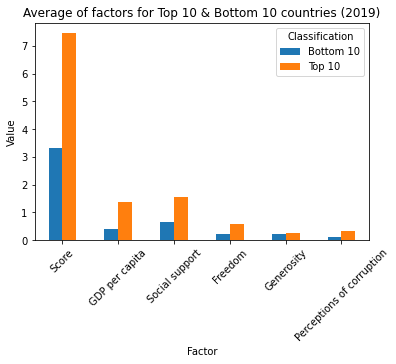

In [37]:
plt.figure(figsize = (10,5))

comp_19f.plot(kind='bar') 
plt.xticks(rotation = 45)

plt.title('Average of factors for Top 10 & Bottom 10 countries (2019)')
plt.ylabel('Value')
plt.xlabel('Factor')

plt.show()

## 6. Analyze the change of score between years

In [38]:
#n.unique 2018 and n.unique 2019. Merge and drop duplicates. Use for loop and for each unique value, substract score

In [39]:
country_19 =data_19.Country.unique()
country_19 = country_19.tolist()
country_19.remove("Gambia")
country_19.remove("Swaziland")
country_19.remove("Comoros")
country_18 = data_18.Country.unique()
country_18 = country_18.tolist()
country_18.remove("Belize")
country_18.remove("Sudan")
country_18.remove("Angola")
country_total = [*country_19,*country_18]
no_duplicates = list( dict.fromkeys(country_total) )
no_duplicates

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria',
 'Australia',
 'Costa Rica',
 'Israel',
 'Luxembourg',
 'United Kingdom',
 'Ireland',
 'Germany',
 'Belgium',
 'United States',
 'Czech Republic',
 'United Arab Emirates',
 'Malta',
 'Mexico',
 'France',
 'Taiwan',
 'Chile',
 'Guatemala',
 'Saudi Arabia',
 'Qatar',
 'Spain',
 'Panama',
 'Brazil',
 'Uruguay',
 'Singapore',
 'El Salvador',
 'Italy',
 'Bahrain',
 'Slovakia',
 'Trinidad & Tobago',
 'Poland',
 'Uzbekistan',
 'Lithuania',
 'Colombia',
 'Slovenia',
 'Nicaragua',
 'Kosovo',
 'Argentina',
 'Romania',
 'Cyprus',
 'Ecuador',
 'Kuwait',
 'Thailand',
 'Latvia',
 'South Korea',
 'Estonia',
 'Jamaica',
 'Mauritius',
 'Japan',
 'Honduras',
 'Kazakhstan',
 'Bolivia',
 'Hungary',
 'Paraguay',
 'Northern Cyprus',
 'Peru',
 'Portugal',
 'Pakistan',
 'Russia',
 'Philippines',
 'Serbia',
 'Moldova',
 'Libya',
 'Montenegro',
 'Tajikistan',
 'Croatia',
 'Hong Kong',

In [40]:
no_duplicates = list( dict.fromkeys(country_total) )

In [41]:
dif_score = pd.DataFrame(columns = ["Country","Score Difference"])

for i in no_duplicates:
    new = data_19[data_19["Country"] == i]
    print(new["Score"])
    old = data_18[data_18["Country"] == i]
    print(old["Score"])   
    dif = float(new["Score"].values - old["Score"].values)
    print("SCORE:", dif)
    print("----") 
    to_append = [i,dif]
    print(to_append)
    a_series = pd.Series(to_append, index = dif_score.columns)
    print(a_series)
    dif_score = dif_score.append(a_series, ignore_index=True)

156    7.769
Name: Score, dtype: float64
0    7.632
Name: Score, dtype: float64
SCORE: 0.13699999999999868
----
['Finland', 0.13699999999999868]
Country             Finland
Score Difference      0.137
dtype: object
157    7.6
Name: Score, dtype: float64
2    7.555
Name: Score, dtype: float64
SCORE: 0.04499999999999993
----
['Denmark', 0.04499999999999993]
Country             Denmark
Score Difference      0.045
dtype: object
158    7.554
Name: Score, dtype: float64
1    7.594
Name: Score, dtype: float64
SCORE: -0.040000000000000036
----
['Norway', -0.040000000000000036]
Country             Norway
Score Difference     -0.04
dtype: object
159    7.494
Name: Score, dtype: float64
3    7.495
Name: Score, dtype: float64
SCORE: -0.001000000000000334
----
['Iceland', -0.001000000000000334]
Country             Iceland
Score Difference     -0.001
dtype: object
160    7.488
Name: Score, dtype: float64
5    7.441
Name: Score, dtype: float64
SCORE: 0.04699999999999882
----
['Netherlands', 0.0469999

202    6.086
Name: Score, dtype: float64
28    6.388
Name: Score, dtype: float64
SCORE: -0.3019999999999996
----
['Argentina', -0.3019999999999996]
Country             Argentina
Score Difference       -0.302
dtype: object
203    6.07
Name: Score, dtype: float64
51    5.945
Name: Score, dtype: float64
SCORE: 0.125
----
['Romania', 0.125]
Country             Romania
Score Difference      0.125
dtype: object
204    6.046
Name: Score, dtype: float64
60    5.762
Name: Score, dtype: float64
SCORE: 0.2839999999999998
----
['Cyprus', 0.2839999999999998]
Country             Cyprus
Score Difference     0.284
dtype: object
205    6.028
Name: Score, dtype: float64
47    5.973
Name: Score, dtype: float64
SCORE: 0.054999999999999716
----
['Ecuador', 0.054999999999999716]
Country             Ecuador
Score Difference      0.055
dtype: object
206    6.021
Name: Score, dtype: float64
44    6.083
Name: Score, dtype: float64
SCORE: -0.0619999999999985
----
['Kuwait', -0.0619999999999985]
Country          

Name: Score, dtype: float64
79    5.358
Name: Score, dtype: float64
SCORE: -0.1609999999999996
----
['Lebanon', -0.1609999999999996]
Country             Lebanon
Score Difference     -0.161
dtype: object
247    5.192
Name: Score, dtype: float64
95    5.093
Name: Score, dtype: float64
SCORE: 0.0990000000000002
----
['Indonesia', 0.0990000000000002]
Country             Indonesia
Score Difference        0.099
dtype: object
248    5.191
Name: Score, dtype: float64
85    5.246
Name: Score, dtype: float64
SCORE: -0.055000000000000604
----
['China', -0.055000000000000604]
Country             China
Score Difference   -0.055
dtype: object
249    5.175
Name: Score, dtype: float64
94    5.103
Name: Score, dtype: float64
SCORE: 0.07200000000000006
----
['Vietnam', 0.07200000000000006]
Country             Vietnam
Score Difference      0.072
dtype: object
250    5.082
Name: Score, dtype: float64
96    5.082
Name: Score, dtype: float64
SCORE: 0.0
----
['Bhutan', 0.0]
Country             Bhutan
Score D

286    4.36
Name: Score, dtype: float64
129    4.308
Name: Score, dtype: float64
SCORE: 0.05200000000000049
----
['Myanmar', 0.05200000000000049]
Country             Myanmar
Score Difference      0.052
dtype: object
287    4.35
Name: Score, dtype: float64
130    4.301
Name: Score, dtype: float64
SCORE: 0.04899999999999949
----
['Chad', 0.04899999999999949]
Country              Chad
Score Difference    0.049
dtype: object
288    4.332
Name: Score, dtype: float64
137    4.103
Name: Score, dtype: float64
SCORE: 0.2290000000000001
----
['Ukraine', 0.2290000000000001]
Country             Ukraine
Score Difference      0.229
dtype: object
289    4.286
Name: Score, dtype: float64
126    4.35
Name: Score, dtype: float64
SCORE: -0.06399999999999917
----
['Ethiopia', -0.06399999999999917]
Country             Ethiopia
Score Difference      -0.064
dtype: object
291    4.189
Name: Score, dtype: float64
134    4.161
Name: Score, dtype: float64
SCORE: 0.02799999999999958
----
['Uganda', 0.027999999999

In [42]:
dif_score = dif_score.sort_values('Score Difference', ascending = False)

In [43]:
import plotly.express as px  

fig = px.choropleth(dif_score,  
                    locations="Country",  
                    color="Score Difference", locationmode='country names') 

fig.update_layout(
    title_text = 'Score Difference per country' 
)

fig.show() 